In [1]:
import json

# 定义读取 JSON 文件的函数
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# 将经纬度转换为平面坐标系
def latlong_to_xy(lat, long, origin_lat, origin_long):
    R = 6371  # 地球半径，单位为公里
    x = R * (long - origin_long) * math.cos(math.radians((lat + origin_lat) / 2))
    y = R * (lat - origin_lat)
    return x, y


# 文件路径
file_path = './us-cities-table.json'  # 请将 'cities.json' 替换为你的 JSON 文件的实际路径

# 读取 JSON 文件
data = read_json_file(file_path)

# 创建一个字典来存储每个城市的经纬度信息
city_coordinates = {}

# 遍历每个城市的数据，提取名称和经纬度
for city in data:
    name = city["name"]
    latitude = city["intptlat"]
    longitude = city["intptlong"]
    city_coordinates[name] = {"latitude": latitude, "longitude": longitude}

# 打印结果
for city, coords in city_coordinates.items():
    print(f"City: {city}, Latitude: {coords['latitude']}, Longitude: {coords['longitude']}")


City: New York, Latitude: 40.6627, Longitude: -73.9387
City: Los Angeles, Latitude: 34.0194, Longitude: -118.411
City: Chicago, Latitude: 41.837, Longitude: -87.6849
City: Houston, Latitude: 29.7857, Longitude: -95.3888
City: Phoenix, Latitude: 33.5722, Longitude: -112.09
City: Philadelphia, Latitude: 40.0094, Longitude: -75.1333
City: San Antonio, Latitude: 29.4628, Longitude: -98.5246
City: San Diego, Latitude: 32.815, Longitude: -117.136
City: Dallas, Latitude: 32.7933, Longitude: -96.7665
City: Jacksonville, Latitude: 30.3369, Longitude: -81.6616
City: Fort Worth, Latitude: 32.782, Longitude: -97.3486
City: Austin, Latitude: 30.2986, Longitude: -97.7541
City: San Jose, Latitude: 37.296, Longitude: -121.815
City: Charlotte, Latitude: 35.209, Longitude: -80.831
City: Columbus, Latitude: 32.5102, Longitude: -84.8749
City: Indianapolis (balance), Latitude: 39.7767, Longitude: -86.1459
City: Seattle, Latitude: 47.6193, Longitude: -122.352
City: San Francisco, Latitude: 37.7272, Longitud

City: New York, X: 458261.00, Y: 123204.95
City: Los Angeles, X: 222515.27, Y: 80880.48
City: Chicago, X: 380808.78, Y: 130686.41
City: Houston, X: 358998.95, Y: 53907.58
City: Phoenix, X: 258706.62, Y: 78031.37
City: Philadelphia, X: 453276.54, Y: 119042.77
City: San Antonio, X: 341433.26, Y: 51850.38
City: San Diego, X: 230962.53, Y: 73207.25
City: Dallas, X: 346553.91, Y: 73069.00
City: Jacksonville, X: 436887.04, Y: 57419.27
City: Fort Worth, X: 343268.58, Y: 72997.01
City: Austin, X: 344661.15, Y: 57175.27
City: San Jose, X: 200177.76, Y: 101755.70
City: Charlotte, X: 432163.83, Y: 88459.42
City: Columbus, X: 414543.69, Y: 71265.37
City: Indianapolis (balance), X: 393399.83, Y: 117560.24
City: Seattle, X: 186435.05, Y: 167525.45
City: San Francisco, X: 193006.87, Y: 104502.88
City: Denver, X: 290630.37, Y: 117465.31
City: Oklahoma City, X: 338141.68, Y: 90103.78
City: Nashville (balance), X: 396938.76, Y: 94593.42
City: El Paso, X: 292940.70, Y: 67045.22
City: Washington, X: 44546

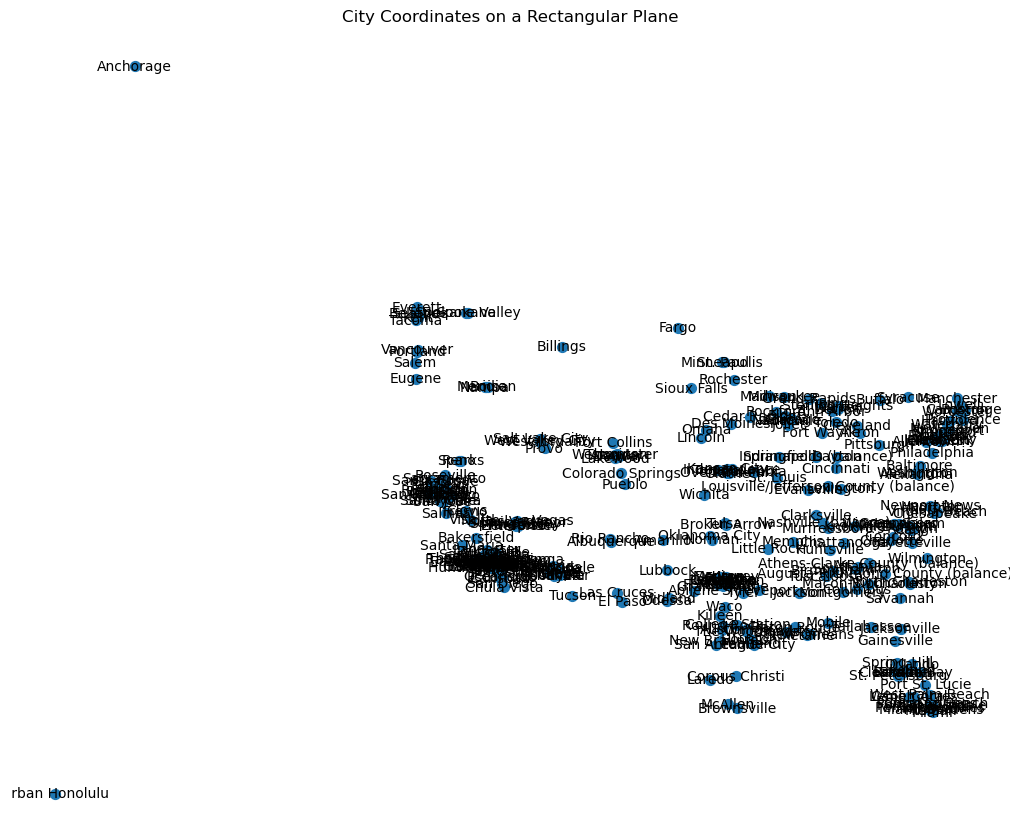

In [2]:
import json
import math
import networkx as nx
import matplotlib.pyplot as plt

# 定义读取 JSON 文件的函数
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 将经纬度转换为平面坐标系
def latlong_to_xy(lat, long, origin_lat, origin_long):
    R = 6371  # 地球半径，单位为公里
    x = R * (long - origin_long) * math.cos(math.radians((lat + origin_lat) / 2))
    y = R * (lat - origin_lat)
    return x, y

# 文件路径
file_path = './us-cities-table.json'  # 请将 'cities.json' 替换为你的 JSON 文件的实际路径

# 读取 JSON 文件
data = read_json_file(file_path)

# 提取经纬度并找到边缘点
latitudes = [city["intptlat"] for city in data]
longitudes = [city["intptlong"] for city in data]

min_lat = min(latitudes)
max_lat = max(latitudes)
min_long = min(longitudes)
max_long = max(longitudes)

# 选择左下角为原点
origin_lat = min_lat
origin_long = min_long

# 创建一个字典来存储每个城市的二维坐标
city_coordinates = {}

# 初始化一个networkx图
G = nx.Graph()

# 遍历每个城市的数据，转换为二维坐标并添加到图中
for city in data:
    name = city["name"]
    latitude = city["intptlat"]
    longitude = city["intptlong"]
    x, y = latlong_to_xy(latitude, longitude, origin_lat, origin_long)
    city_coordinates[name] = {"x": x, "y": y}
    G.add_node(name, pos=(x, y))

# 打印结果
for city, coords in city_coordinates.items():
    print(f"City: {city}, X: {coords['x']:.2f}, Y: {coords['y']:.2f}")

# 画图
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10)
plt.title('City Coordinates on a Rectangular Plane')
plt.xlabel('X coordinate (km)')
plt.ylabel('Y coordinate (km)')
plt.grid(True)
plt.show()


City: New York, X: 262124.67, Y: 94848.26
City: Los Angeles, X: 26002.98, Y: 52523.80
City: Chicago, X: 187581.91, Y: 102329.73
City: Houston, X: 156306.23, Y: 25550.90
City: Phoenix, X: 61051.03, Y: 49674.69
City: Philadelphia, X: 256708.29, Y: 90686.09
City: San Antonio, X: 138835.98, Y: 23493.70
City: San Diego, X: 33242.86, Y: 44850.57
City: Dallas, X: 146435.84, Y: 44712.32
City: Jacksonville, X: 233087.20, Y: 29062.59
City: Fort Worth, X: 143209.14, Y: 44640.32
City: Austin, X: 142635.25, Y: 28818.58
City: San Jose, X: 7080.85, Y: 73399.02
City: Charlotte, X: 232156.26, Y: 60102.74
City: Columbus, X: 212808.99, Y: 42908.68
City: Indianapolis (balance), X: 198053.73, Y: 89203.56
City: Seattle, X: 3918.06, Y: 139168.76
City: San Francisco, X: 471.32, Y: 76146.19
City: Denver, X: 97703.64, Y: 89108.63
City: Oklahoma City, X: 140383.36, Y: 61747.09
City: Nashville (balance), X: 198475.56, Y: 66236.74
City: El Paso, X: 93157.98, Y: 38688.53
City: Washington, X: 248160.67, Y: 83644.86


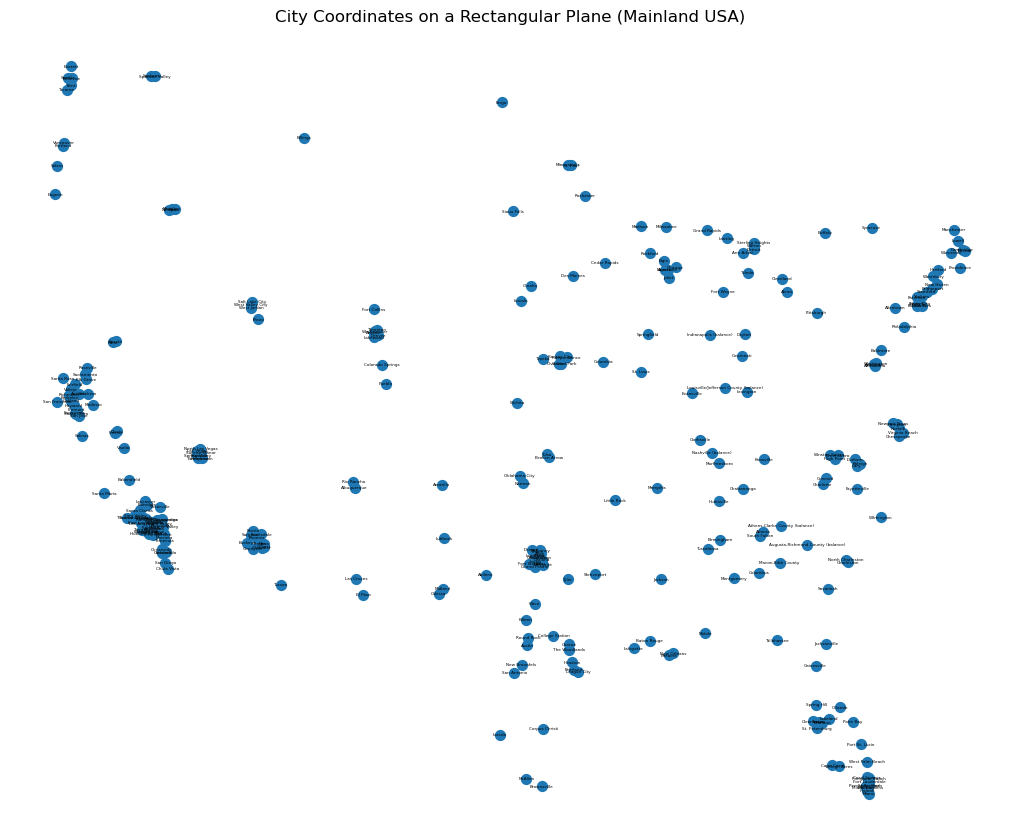

In [10]:
import json
import math
import networkx as nx
import matplotlib.pyplot as plt

# 定义读取 JSON 文件的函数
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 将经纬度转换为平面坐标系
def latlong_to_xy(lat, long, origin_lat, origin_long):
    R = 6371  # 地球半径，单位为公里
    x = R * (long - origin_long) * math.cos(math.radians((lat + origin_lat) / 2))
    y = R * (lat - origin_lat)
    return x, y

# 判断是否在美国本土
def is_within_mainland_usa(lat, long):
    return 24.396308 <= lat <= 49.384358 and -125.0 <= long <= -66.93457

# 文件路径
file_path = './us-cities-table.json'  # 请将 'cities.json' 替换为你的 JSON 文件的实际路径

# 读取 JSON 文件
data = read_json_file(file_path)

# 提取美国本土城市的经纬度并找到边缘点
latitudes = [city["intptlat"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]
longitudes = [city["intptlong"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]

min_lat = min(latitudes)
min_long = min(longitudes)

# 选择左下角为原点
origin_lat = min_lat
origin_long = min_long

# 创建一个字典来存储每个城市的二维坐标
city_coordinates = {}


def convert_absolute_x_y_corrinates_to_relative(city_coordinates):
    min_x = min(city_coordinates.values(), key=lambda x: x["x"])["x"]
    min_y = min(city_coordinates.values(), key=lambda x: x["y"])["y"]
    for city, coords in city_coordinates.items():
        coords["x"] -= min_x
        coords["y"] -= min_y
    return city_coordinates

# 初始化一个networkx图
G = nx.Graph()

# 遍历每个城市的数据，转换为二维坐标并添加到图中
for city in data:
    latitude = city["intptlat"]
    longitude = city["intptlong"]

    if is_within_mainland_usa(latitude, longitude):
        name = city["name"]
        x, y = latlong_to_xy(latitude, longitude, origin_lat, origin_long)
        # x -= min_x
        # y -= min_y
        city_coordinates[name] = {"x": x, "y": y}
        G.add_node(name, pos=(x, y))

# 打印结果
for city, coords in city_coordinates.items():
    print(f"City: {city}, X: {coords['x']:.2f}, Y: {coords['y']:.2f}")

# 画图
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=3)
plt.title('City Coordinates on a Rectangular Plane (Mainland USA)')
plt.xlabel('X coordinate (km)')
plt.ylabel('Y coordinate (km)')
plt.grid(True)
plt.show()


City: New York, X: 4103.61 km, Y: 1655.41 km
City: Los Angeles, X: -17.49 km, Y: 916.71 km
City: Chicago, X: 2802.60 km, Y: 1785.99 km
City: Houston, X: 2256.73 km, Y: 445.95 km
City: Phoenix, X: 594.22 km, Y: 866.99 km
City: Philadelphia, X: 4009.08 km, Y: 1582.77 km
City: San Antonio, X: 1951.82 km, Y: 410.04 km
City: San Diego, X: 108.87 km, Y: 782.79 km
City: Dallas, X: 2084.46 km, Y: 780.38 km
City: Jacksonville, X: 3596.81 km, Y: 507.24 km
City: Fort Worth, X: 2028.15 km, Y: 779.12 km
City: Austin, X: 2018.13 km, Y: 502.98 km
City: San Jose, X: -347.74 km, Y: 1281.05 km
City: Charlotte, X: 3580.57 km, Y: 1048.99 km
City: Columbus, X: 3276.52 km, Y: 1579.94 km
City: Indianapolis (balance), X: 2985.37 km, Y: 1556.90 km
City: Seattle, X: -402.94 km, Y: 2428.95 km
City: San Francisco, X: -463.10 km, Y: 1329.00 km
City: Denver, X: 1233.93 km, Y: 1555.24 km
City: Oklahoma City, X: 1978.83 km, Y: 1077.69 km
City: Nashville (balance), X: 2992.73 km, Y: 1156.05 km
City: El Paso, X: 1154.5

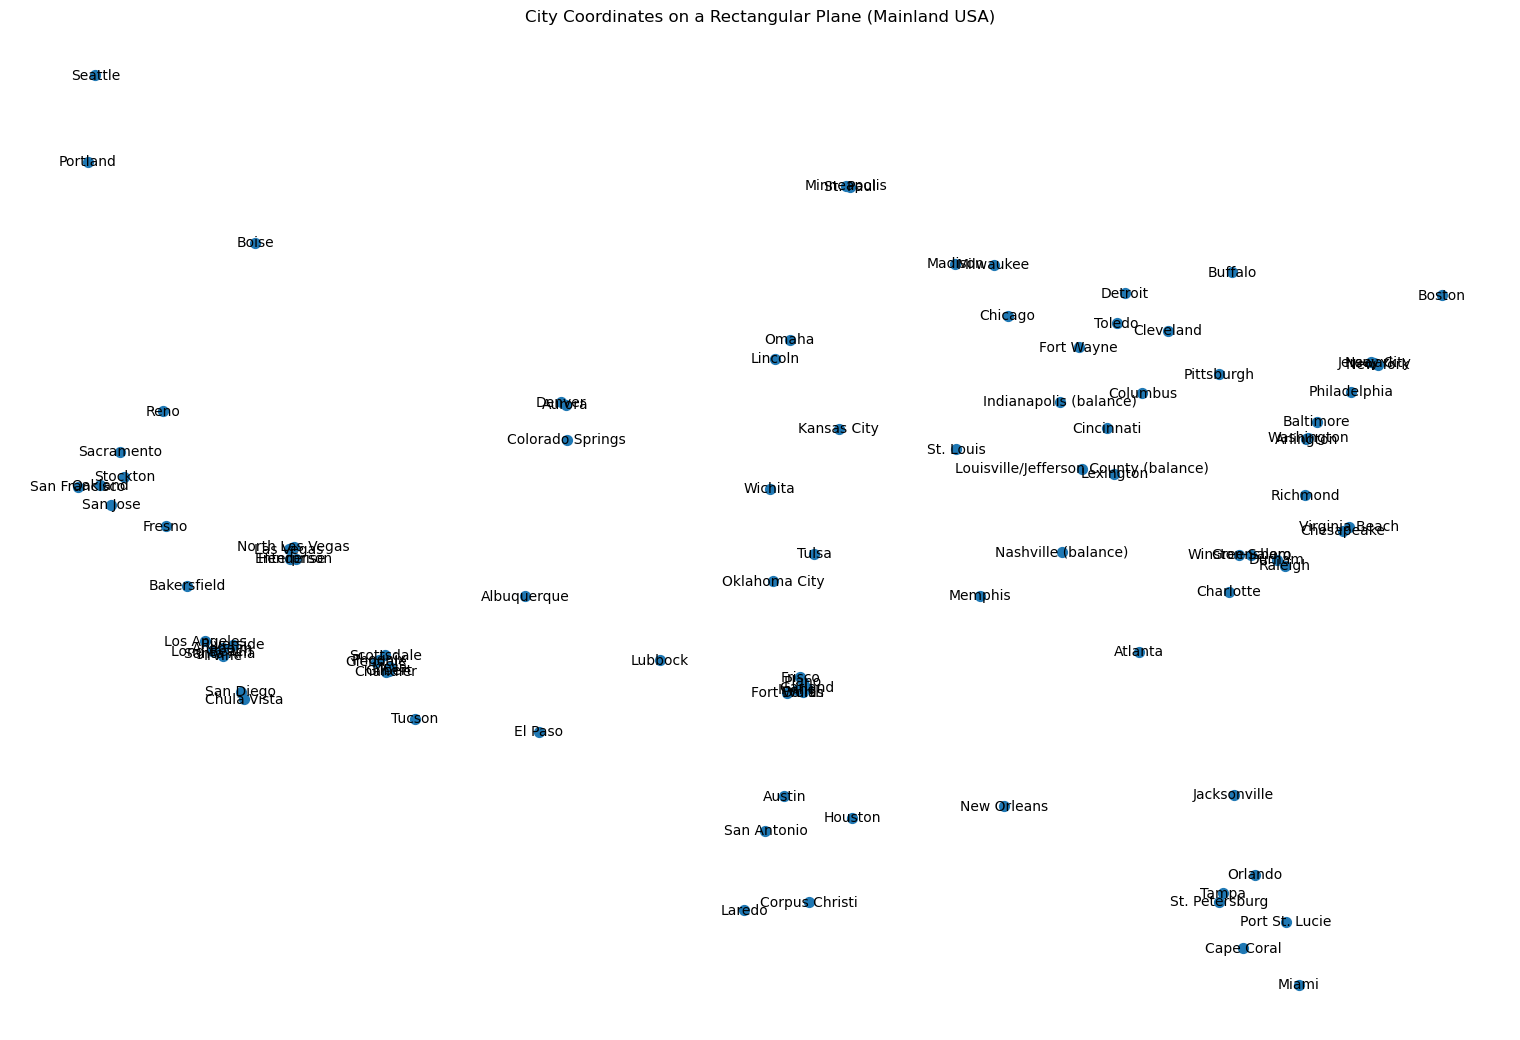

In [21]:
import json
import math
import networkx as nx
import matplotlib.pyplot as plt

# 定义读取 JSON 文件的函数
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 将经纬度转换为平面坐标系
def latlong_to_xy(lat, long, origin_lat, origin_long):
    # 地球平均半径，单位为公里
    R = 6371.0

    # 将度数转换为弧度
    lat = math.radians(lat)
    long = math.radians(long)
    origin_lat = math.radians(origin_lat)
    origin_long = math.radians(origin_long)

    # 使用简化的近似公式转换经纬度为平面坐标
    x = R * (long - origin_long) * math.cos((lat + origin_lat) / 2)
    y = R * (lat - origin_lat)
    return x, y
# 判断是否在美国本土
def is_within_mainland_usa(lat, long):
    return 24.396308 <= lat <= 49.384358 and -125.0 <= long <= -66.93457

# 文件路径
file_path = './us-cities-table.json'  # 请将 'cities.json' 替换为你的 JSON 文件的实际路径

# 读取 JSON 文件
data = read_json_file(file_path)

# 提取美国本土城市的经纬度并找到边缘点
latitudes = [city["intptlat"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]
longitudes = [city["intptlong"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]

min_lat = min(latitudes)
min_long = min(longitudes)

# 选择左下角为原点
origin_lat = min_lat
origin_long = min_long

# 创建一个字典来存储每个城市的二维坐标
city_coordinates = {}

# 初始化一个networkx图
G = nx.Graph()




# 遍历top 100城市的数据，转换为二维坐标并添加到图
for city in data[:100]:
    latitude = city["intptlat"]
    longitude = city["intptlong"]
    
    if is_within_mainland_usa(latitude, longitude):
        name = city["name"]
        x, y = latlong_to_xy(latitude, longitude, origin_lat, origin_long)
        city_coordinates[name] = {"x": x, "y": y}
        G.add_node(name, pos=(x, y))


for city, coords in city_coordinates.items():
    coords["x"] -= x_min

# 打印结果
for city, coords in city_coordinates.items():
    print(f"City: {city}, X: {coords['x']:.2f} km, Y: {coords['y']:.2f} km")
print(len(city_coordinates))
# 画图
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=10)
plt.title('City Coordinates on a Rectangular Plane (Mainland USA)')
plt.xlabel('X coordinate (km)')
plt.ylabel('Y coordinate (km)')
plt.grid(True)
plt.show()


City: New York, X: 4574.94 km, Y: 1655.41 km
City: Los Angeles, X: 453.84 km, Y: 916.71 km
City: Chicago, X: 3273.92 km, Y: 1785.99 km
City: Houston, X: 2728.06 km, Y: 445.95 km
City: Phoenix, X: 1065.54 km, Y: 866.99 km
City: San Antonio, X: 2423.14 km, Y: 410.04 km
City: San Diego, X: 580.20 km, Y: 782.79 km
City: Dallas, X: 2555.79 km, Y: 780.38 km
City: Jacksonville, X: 4068.14 km, Y: 507.24 km
City: San Jose, X: 123.58 km, Y: 1281.05 km
City: Charlotte, X: 4051.89 km, Y: 1048.99 km
City: Columbus, X: 3714.22 km, Y: 748.90 km
City: Indianapolis (balance), X: 3456.69 km, Y: 1556.90 km
City: Seattle, X: 68.38 km, Y: 2428.95 km
City: San Francisco, X: 8.23 km, Y: 1329.00 km
City: Denver, X: 1705.25 km, Y: 1555.24 km
City: Oklahoma City, X: 2450.15 km, Y: 1077.69 km
City: Nashville (balance), X: 3464.05 km, Y: 1156.05 km
City: El Paso, X: 1625.91 km, Y: 675.24 km
City: Washington, X: 4331.22 km, Y: 1459.88 km
City: Las Vegas, X: 748.65 km, Y: 1162.91 km
City: Boston, X: 4799.68 km, Y: 

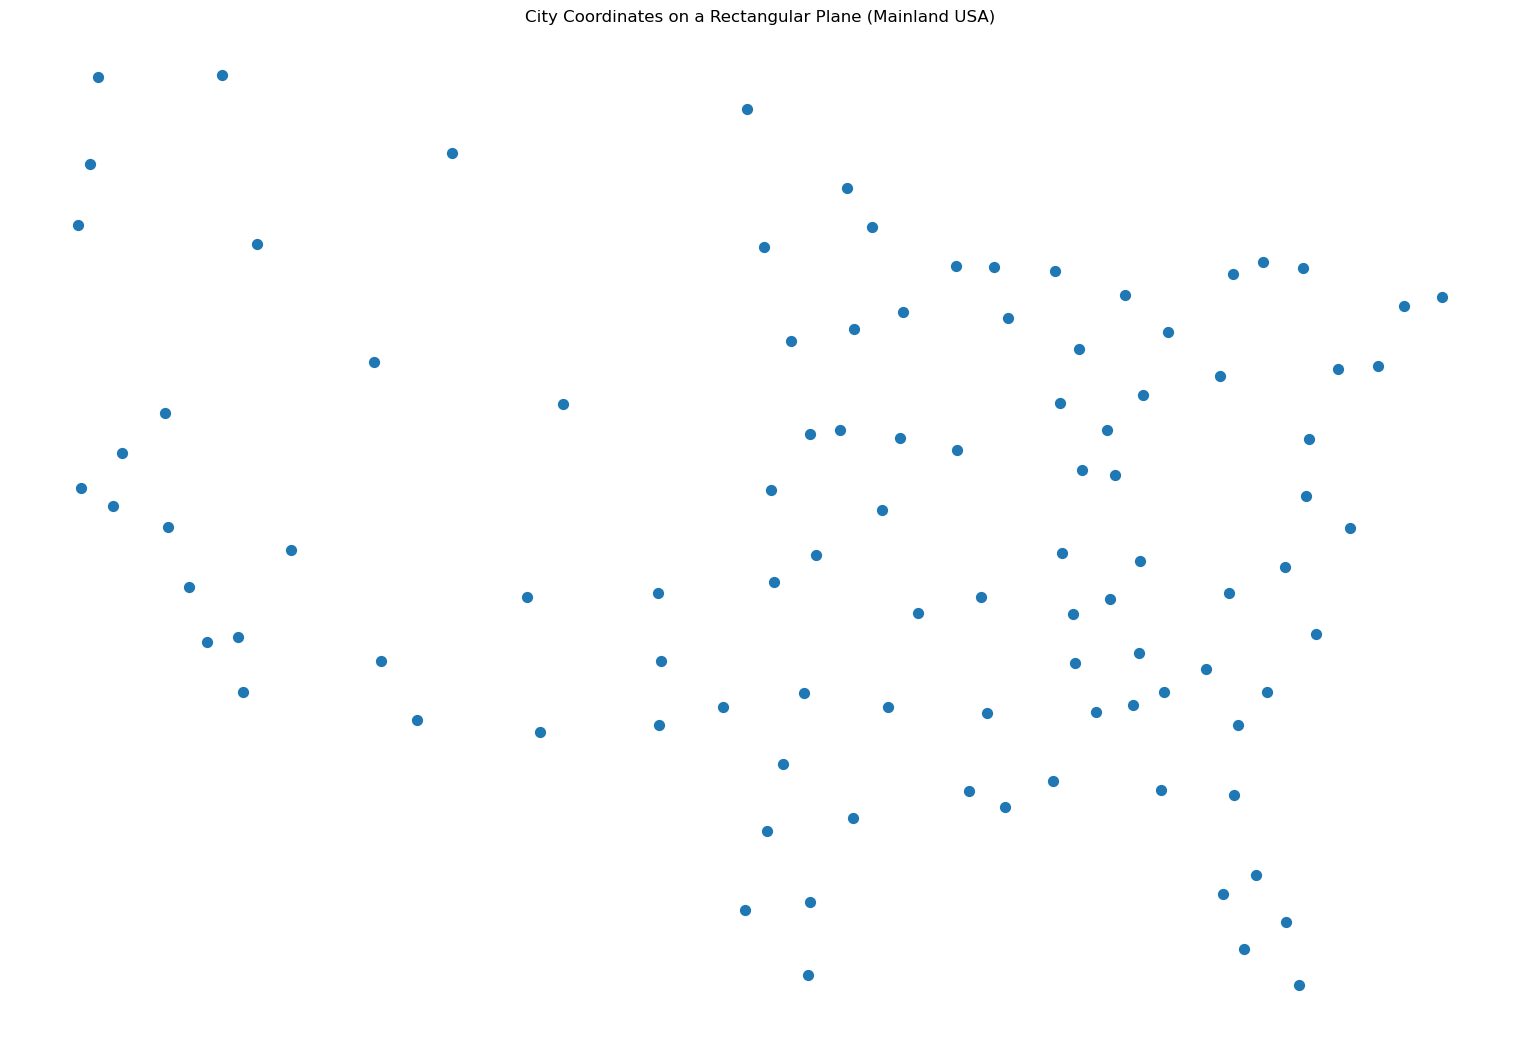

In [3]:
import json
import math
import networkx as nx
import matplotlib.pyplot as plt
import random

# 定义读取 JSON 文件的函数
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 将经纬度转换为平面坐标系
def latlong_to_xy(lat, long, origin_lat, origin_long):
    # 地球平均半径，单位为公里
    R = 6371.0

    # 将度数转换为弧度
    lat_rad = math.radians(lat)
    long_rad = math.radians(long)
    origin_lat_rad = math.radians(origin_lat)
    origin_long_rad = math.radians(origin_long)

    # 使用简化的近似公式转换经纬度为平面坐标
    x = R * (long_rad - origin_long_rad) * math.cos((lat_rad + origin_lat_rad) / 2)
    y = R * (lat_rad - origin_lat_rad)
    return x, y

# 判断是否在美国本土
def is_within_mainland_usa(lat, long):
    return 24.396308 <= lat <= 49.384358 and -125.0 <= long <= -66.93457

# 文件路径
file_path = './us-cities-table.json'  # 请将 'cities.json' 替换为你的 JSON 文件的实际路径

# 读取 JSON 文件
data = read_json_file(file_path)

# 提取美国本土城市的经纬度并找到边缘点
latitudes = [city["intptlat"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]
longitudes = [city["intptlong"] for city in data if is_within_mainland_usa(city["intptlat"], city["intptlong"])]

min_lat = min(latitudes)
min_long = min(longitudes)

# 选择左下角为原点
origin_lat = min_lat
origin_long = min_long

# 创建一个字典来存储每个城市的二维坐标
city_coordinates = {}

# 初始化一个networkx图
G = nx.Graph()
G_endnode = nx.Graph()
# 遍历top100城市的数据，转换为二维坐标并添加到图中
i = 0
for city in data:
    latitude = city["intptlat"]
    longitude = city["intptlong"]
    if i == 100:
        break
    
    if is_within_mainland_usa(latitude, longitude):
        name = city["name"]
        x, y = latlong_to_xy(latitude, longitude, origin_lat, origin_long)
        
        too_close = False
        for node in G:
            if abs(G.nodes[node]['pos'][0] - x) < 100 and abs(G.nodes[node]['pos'][1] - y) < 100:
                too_close = True
                break
        if too_close:
            continue
        city_coordinates[name] = {"x": x, "y": y}
        G.add_node(name, pos=(x, y))
        G_endnode.add_node(i, pos=(x, y), type='endnode', num_qubits=random.randint(10, 30))
        i += 1

# 获取所有X和Y的最小值
all_x_values = [coords['x'] for coords in city_coordinates.values()]
all_y_values = [coords['y'] for coords in city_coordinates.values()]

min_x = min(all_x_values)
min_y = min(all_y_values)

# 平移所有坐标使其成为正值
for city in city_coordinates:
    city_coordinates[city]['x'] -= min_x
    city_coordinates[city]['y'] -= min_y
    # 更新networkx图中的节点位置
    G.nodes[city]['pos'] = (city_coordinates[city]['x'], city_coordinates[city]['y'])

for node in G_endnode:
    G_endnode.nodes[node]['pos'] = (G_endnode.nodes[node]['pos'][0] - min_x, G_endnode.nodes[node]['pos'][1] - min_y)

# 打印结果
for city, coords in city_coordinates.items():
    print(f"City: {city}, X: {coords['x']:.2f} km, Y: {coords['y']:.2f} km")

for node in G_endnode:
    print(f"Endnode: {node}, X: {G_endnode.nodes[node]['pos'][0]:.2f} km, Y: {G_endnode.nodes[node]['pos'][1]:.2f} km")
print(len(city_coordinates))
# 画图
pos = nx.get_node_attributes(G_endnode, 'pos')
plt.figure(figsize=(15, 10))
# nx.draw(G, pos, with_labels=True, node_size=50, font_size=10)
nx.draw(G_endnode, pos, node_size=50, font_size=10)
plt.title('City Coordinates on a Rectangular Plane (Mainland USA)')
plt.xlabel('X coordinate (km)')
plt.ylabel('Y coordinate (km)')
plt.grid(True)
plt.show()


dirPath = '../dist/endnodes/'
fileName = 'us-top100.json'
with open(dirPath + fileName, 'w') as file:
    json.dump(nx.node_link_data(G_endnode), file)

file.close()